# **Exploratory Data Analysis**

**Data: Hate Speech and Offensive Language dataset**

Link to research paper: https://arxiv.org/abs/1703.04009

The dataset consists of **24,783 tweets** which have been classified into 3 categories: **hate speech**, **offensive** and **neither**.

The original data was obtained by searching for tweets, using the Twitter API, that contained hate speech words and phrases as compiled by Hatebase.org.

The classification process then involved using a crowd sourcing platform (CrowdFlower). Workers were provided with the following **definition of hate speech**:

'..language that is used to express hatred towards a targeted group or is intended to be derogatory, to humiliate, or to insult the members of the group. In extreme cases this may also be language that threatens or incites violence.

According to the research paper, offensive language was treated as a separate category because people often use terms that are highly offensive to certain groups but in a qualitatively different manner.

Each tweet was assessed by three or more people and the majority decision was used to assign a final classification.

Information is not available regarding the gender, location etc. of those who manually classified the tweets.

**Uploading the data from Kaggle:**

(This requires providing your personal Kaggle username and key which can be found in the profile settings on Kaggle.)

In [1]:
# Step 1: Upload the kaggle.json file
from google.colab import files
files.upload()

# Step 2: Install Kaggle and authenticate
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify Kaggle API
!kaggle datasets list

# Step 3: Download the dataset
!kaggle datasets download -d mrmorj/hate-speech-and-offensive-language-dataset

# Step 4: Unzip the dataset
import zipfile
import os

if not os.path.exists('hate-speech-dataset'):
    os.makedirs('hate-speech-dataset')

with zipfile.ZipFile('hate-speech-and-offensive-language-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('hate-speech-dataset')

# Step 5: Load the dataset into a DataFrame
import pandas as pd

dataset_path = 'hate-speech-dataset/labeled_data.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
print(df.head())


In [2]:
import pandas as pd
import os
import opendatasets as od

In [3]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: angelakinnen
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset


100%|██████████| 1.01M/1.01M [00:00<00:00, 61.1MB/s]

In [4]:
data_dir = './hate-speech-and-offensive-language-dataset'

In [5]:
os.listdir(data_dir)

['labeled_data.csv']

In [6]:
df = pd.read_csv('hate-speech-and-offensive-language-dataset/labeled_data.csv')

In [7]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Data checks: missing values and replicated tweets**

In [8]:
print(df.isnull().sum())

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


No missing values.

In [9]:
num_duplicates = df.duplicated(subset='tweet').sum()
print(f"Number of duplicate tweets: {num_duplicates}")

Number of duplicate tweets: 0


**Data distribution across classes**

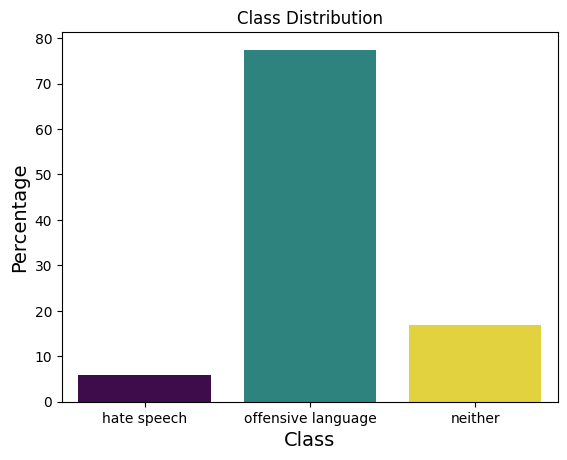

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage frequencies
class_counts = df['class'].value_counts(normalize=True) * 100
class_percentages = class_counts.reset_index()
class_percentages.columns = ['class', 'percentage']


pl = sns.barplot(x='class', y='percentage', data=class_percentages, hue='class', palette= 'viridis', legend=False)

pl.set_title('Class Distribution (Percentage)', fontsize=16)
pl.set_xlabel('Class', fontsize=14)
pl.set_ylabel('Percentage', fontsize=14)

pl.set_title('Class Distribution')
pl.set_xticks([0, 1, 2])
pl.set_xticklabels(['hate speech', 'offensive language', 'neither'])
plt.show()

The data is very imbalanced across classes - does this need to be considered as an issue?

   class  average_length
0      0       84.586713
1      1       83.457113
2      2       94.850108


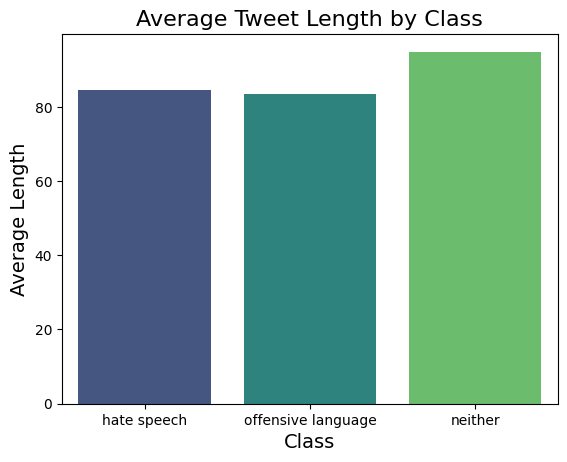

In [17]:

df['tweet_length'] = df['tweet'].apply(len)

# Group by the 'label' column and calculate the mean tweet length for each class
average_lengths = df.groupby('class')['tweet_length'].mean().reset_index()

# Rename the columns for clarity
average_lengths.columns = ['class', 'average_length']

print(average_lengths)

# Map label numbers to names for better readability
class_mapping = {0: 'hate speech', 1: 'offensive language', 2: 'neither'}
average_lengths['class'] = average_lengths['class'].map(label_mapping)

# Create a bar plot to visualize the average tweet lengths
ax = sns.barplot(x='class', y='average_length', data=average_lengths, hue = 'class', palette='viridis')

# Set the title and labels with custom font sizes
ax.set_title('Average Tweet Length by Class', fontsize=16)
ax.set_xlabel('Class', fontsize=14)
ax.set_ylabel('Average Length', fontsize=14)

# Show the plot
plt.show()

**Word Cloud visualisation (WARNING: highly offensive text)**

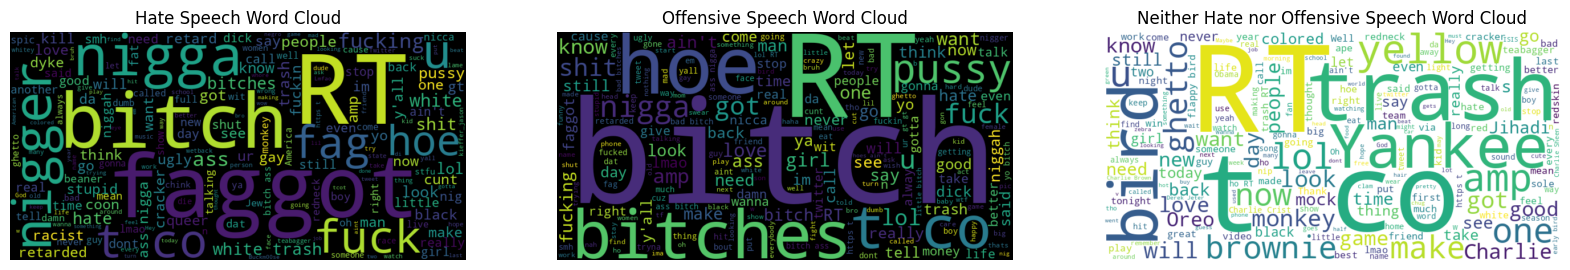

In [67]:
from wordcloud import WordCloud

# Generate word clouds for hate speech and non-hate speech

hate_speech = ' '.join(df[df['class'] == 0]['tweet'])
offensive_speech = ' '.join(df[df['class'] == 1]['tweet'])
neither_speech = ' '.join(df[df['class'] == 2]['tweet'])

wordcloud_hate = WordCloud(width=800, height=400, background_color='black').generate(hate_speech)
wordcloud_offensive = WordCloud(width=800, height=400, background_color='black').generate(offensive_speech)
wordcloud_neither = WordCloud(width=800, height=400, background_color='white').generate(neither_speech)

# Plot word clouds
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.title('Hate Speech Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_offensive, interpolation='bilinear')
plt.title('Offensive Speech Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neither, interpolation='bilinear')
plt.title('Neither Hate nor Offensive Speech Word Cloud')
plt.axis('off')

plt.show()

**Prepare the dataframe**

In [29]:
df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'tweet_length'], inplace=True)

In [32]:
df.head()


,class,tweet,tweet_length
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


**N-grams**

The following identifies and visualizes the most common trigrams (a contiguous sequence of 3 items within the tweet) for each class of the dataset:

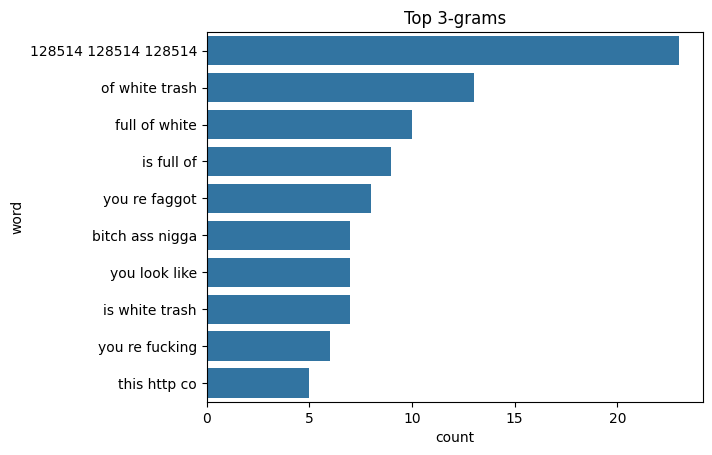

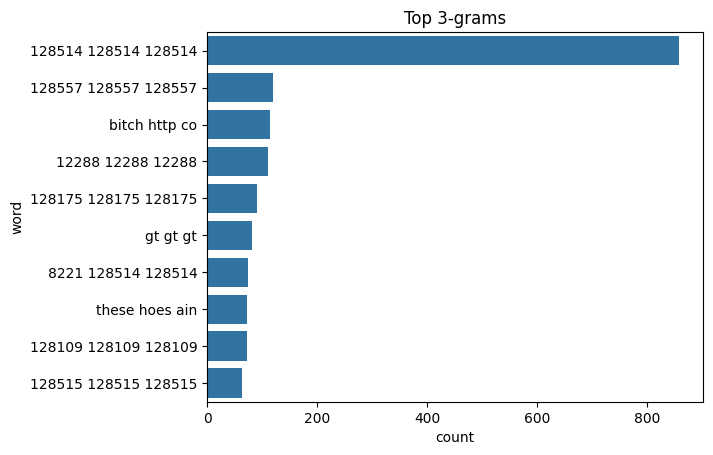

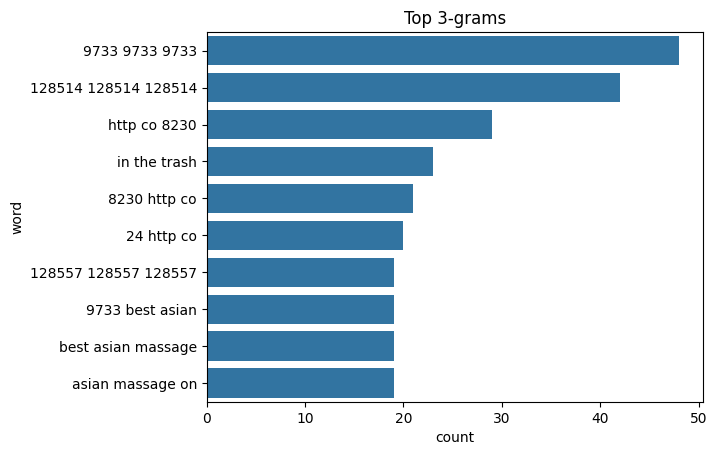

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def plot_ngrams(text, n=2):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:10]
    df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

    sns.barplot(x='count', y='word', data=df_common_words)
    plt.title(f'Top {n}-grams')
    plt.show()

# Plot most frequent trigrams for each class

plot_ngrams(df[df['class'] == 0]['tweet'], n=3)

plot_ngrams(df[df['class'] == 1]['tweet'], n=3)

plot_ngrams(df[df['class'] == 2]['tweet'], n=3)

plt.show()

The tri-grams show sequences of numbers, particularly common in the offensive and neither classes. Numbers of 6 digits beginning with 128*** appear to be decimal code for emoticons.

**Use of emojis in tweets**

In [61]:
import re

def decimal_to_emoji(text):
    # Find all decimal codes in the text
    decimal_codes = re.findall(r'128\d{3}', text)
    # Convert decimal codes to emojis
    return decimal_codes

# Apply the function to extract and convert emojis from each tweet
df['emojis'] = df['tweet'].apply(decimal_to_emoji)

In [62]:
df.head(20)

,class,tweet,tweet_length,emojis
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,[]
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,[]
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,[]
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,[]
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,[]
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",158,"[128514, 128514, 128514]"
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",105,[]
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,98,[]
8,1,""" &amp; you might not get ya bitch back &amp; ...",58,[]
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",55,[]


In [64]:
# Initialize counters for each class
counters = {
    'hate_speech': Counter(),
    'offensive_language': Counter(),
    'neither': Counter()
}

# Populate the counters
for _, row in df.iterrows():
    label = row['class']
    if label == 0:
        counters['hate_speech'].update(row['emojis'])
    elif label == 1:
        counters['offensive_language'].update(row['emojis'])
    else:
        counters['neither'].update(row['emojis'])

# Convert counters to DataFrame
emoji_df = pd.DataFrame.from_dict(counters, orient='index').fillna(0).T
emoji_df.index.name = 'decimal_code'

# Function to convert decimal code to emoji
def decimal_to_emoji(decimal_code):
    try:
        if 0 <= int(decimal_code) <= 0x10FFFF:
            return chr(int(decimal_code))
        else:
            return None  # or a placeholder like ''
    except (ValueError, OverflowError):
        return None  # or a placeholder like ''

# Add a new column for the emoji characters
emoji_df['emoji'] = emoji_df.index.map(decimal_to_emoji)

# Remove rows with invalid emoji characters
emoji_df = emoji_df[emoji_df['emoji'].notnull()]

# Reset the index to include the decimal code in the DataFrame
emoji_df.reset_index(inplace=True)

emoji_df.head(20)

,decimal_code,hate_speech,offensive_language,neither,emoji
0,128166,1.0,55.0,2.0,💦
1,128563,3.0,76.0,8.0,😳
2,128514,96.0,2965.0,180.0,😂
3,128293,1.0,29.0,4.0,🔥
4,128530,4.0,241.0,19.0,😒
5,128522,1.0,25.0,6.0,😊
6,128561,2.0,14.0,1.0,😱
7,128534,2.0,13.0,1.0,😖
8,128555,2.0,28.0,3.0,😫
9,128553,10.0,328.0,30.0,😩
